<a href="https://colab.research.google.com/github/akashsingh11596/Information-Theory/blob/main/INTRODUCTION_OF_FORWARD_ERROR_CORRECTION_AND_ITS_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTRODUCTION OF FORWARD ERROR CORRECTION AND ITS ANALYSIS**

**NAME - AKASH SINGH**

**UNIVERSITY OF REGINA**





**PART 1: PROBLEM DEFINITION**

In this assignment, we have to build upon 3rd assignment. We have to introduce a forward error correction scheme to our previous assignment's encoding and decoding scheme. This forward correction scheme has to improve the robustness of the code and make it more efficient. We have to also describe any limitation in the scheme used by us. We have to print a message to the user if the number of error will exceeds the limit of errors permitted by the forward error correction scheme. 

In [ ]:
import numpy as np
import math
import struct
from scipy import signal as sg
import matplotlib
import matplotlib.pyplot as plt
import binascii
import random

In [ ]:
random_values = []
def noise(amplitude, signal_Length):
  amplitude = amplitude
  signal_length =signalLength
  for x in range(signal_Length):
    random_values = 0.1/((random.uniform(-100,100))/100)
  
  return random_values  

**PART 2: CHOOSING A METHOD**

The method chosen for the forward error encoding scheme is the Hamming method. This method is taking in 7 bits of data and will generate 18 bits of the codeword. This codeword is generated by introducing parity bits into it. The parity bits are in-between the bits of the original message. This is done for easy identification of the robustness of the decoding scheme. Robustness can be determined by just checking the parity bits for the change in the value of 0 and 1. If there is an error, hamming forward error correction code will signal the user that there is a change in the received and decoded signal by printing a message on their screen. This means that either correction on the places where a bit is changed has to take place or the sender can send the whole data again.

Hamming Code is chosen by us as a technique for forwarding error correction because the Hamming code is known to give an efficient performance on the encoding scheme that we have used. Hamming code also helps with the correction of the bits with the error. The hamming code used in the encoding and decoding scheme is referenced from the GitHub site of absingh31 [1].

**PART 3: IMPLEMENTATION OF FORWARD ERROR CORRECTION SCHEME**

In this encoding/decoding schemes, we are introducing a forward error correction technique. Hamming FEC (Forward Error Correction) is the name of the technique that is being introduced. The encode function works by taking the data in ASCII form and then converting it to the Binary form. This binary message is the message for the introduction of the parity bits. The Hamming code adds the parity bits into the original binary message before the introduction of the noise.

Parity is introduced by counting the number of 1's. If the number of 1's are odd, 1 will be added and if the number of 1's is even then 0 will be added. This is at the positions which are multiple of 2 like 1,2,4,8 and so on.

The Hamming code completes its work by adding parity bits to the binary message and gives a series of codewords as output. Introduction of these parity bits helps in the recognition of any bit with error after decoding the signal. 

The codewords are sent over the signal and, there is a crossing with the noise. Noise is produced using 'random' function and is transmitted over a carrier signal. This transmitted signal is shown by the means of the graph using matplotlib.

[1, 0, 0, 1, 0, 0, 0]
Hamming code generated is:- [1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0]


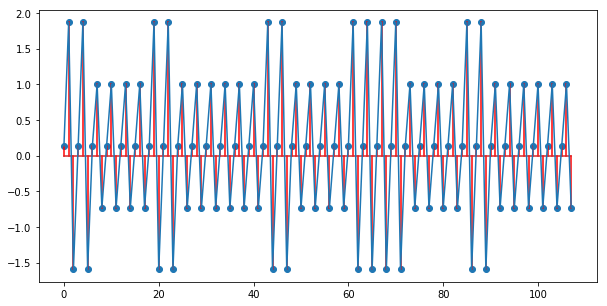

In [ ]:
def encode(asciiMessage):
  asciiMessage = asciiMessage
  global length
  global spb
  global signalLength
  global signal
  global noisegen
  global finalDecoded
  global hamming_gen
  signal = []
  noisegen = []
  spb = 6
  cpb = 2
  T = spb/cpb
  
  binMessage =bin(int.from_bytes(asciiMessage.encode(), 'big'))
  binMessage = binMessage.replace("b","")
  message = []
  for bit in binMessage:
    message.append(int(bit))
    
  # Removing first element
  message.pop(0) 
  
  # Conversion of list back to string
  strtest = ''.join(map(str,message))
  strtest1 = strtest
  # Clearing of message list so that new values can be appended
  message.clear()
  
  # Appending string to the message list for encoding and adding noise
  for bit in strtest1:
    message.append(int(bit))
  print(message)
  #======================================================================  
  
  # Generating hamming code
  d=strtest
  data=list(d)
  data.reverse()
  c,ch,j,r,h=0,0,0,0,[]

  while ((len(d)+r+1)>(pow(2,r))):
    r=r+1

  for i in range(0,(r+len(data))):
    p=(2**c)

    if(p==(i+1)):
      h.append(0)
      c=c+1

    else:
      h.append(int(data[j]))
      j=j+1

  for parity in range(0,(len(h))):
    ph=(2**ch)
    if(ph==(parity+1)):
      startIndex=ph-1
      i=startIndex
      toXor=[]
      while(i<len(h)):
        block=h[i:i+ph]
        toXor.extend(block)
        i+=2*ph

      for z in range(1,len(toXor)):
        h[startIndex]=h[startIndex]^toXor[z]
      ch+=1

  h.reverse()
  print('Hamming code generated is:- ', end="")
  hamming_gen = (int(''.join(map(str, h))))
  
  #=======================================================================
  
  # Appending string to the message list for encoding and adding noise
  ham = str(hamming_gen)
  for bit in ham:
    message.append(int(bit))
  print(message)
  
  
  samples = spb*len(message)
  x = np.arange(samples)
  carrier = np.sin(2*np.pi*(1/T)*(x))
  x_list = x.tolist()
  
  
  # Encoding of bits in message list
  messageList = []
  for bit in message:
    if bit is 0:
      for i in range(0,spb):
        messageList.append(1)
    else:
      for i in range(0,spb):
        messageList.append(2)
  message = messageList
  length = len(message)
  signal = carrier * message
  
  signalLength = len(signal)
  
  noisegen = noise(2, signalLength)
  signal = signal + noisegen
  
  % matplotlib inline
  plt.figure(figsize = (10,5))
  plt.stem(x,signal, 'r')
  plt.plot(x,signal)
  
  
  return signal
global counterValue
global counter
counter = 0
global asciiMessage
asciiMessage = 'H'
signal = encode(asciiMessage)



**PART 4: DECODING AND PARITY CHECK**

Decode function receives the signal sent by encode function. The decode function accepts the received signal and starts to perform decoding. In this function, bits are compared with the threshold value and according to 0 and 1 are append into a new final list. This final list is the list used for the parity checking.


Parity check is performed by traversing through the whole list of bits and then comparing each bit at the position of the multiple of 2, like 1,2,4,8 and so on, with the current calculated parity value. If in the counting of 1's there is a difference found in the value of the previous parity bit and the newly calculated parity value, it will mean that particular bit is wrong. This will continue for every parity bit. The position number of each parity bit with the different parity bit value than the previous parity bit value will be added together. The final result that we will get on doing the sum of the positions of the wrong parity bit will give the position of the actual bit value that contains the error.

If there is a correction in the final decoded message then the user will be informed by a message "After correction hamming code is:-". This message is printed just to indicate the user that there were some errors in the received message and after correction, the correct message is displayed onto the screen.

Hamming code can only detect error up to a limit of two and correct error up to a limit of one. Therefore, we have printed "Errors greater than permitted by the scheme" to indicate the user that the error that is introduced into the scheme is more than what is allowed by the hamming scheme and therefore, the sender will have to send the whole signal again.

In [ ]:
 final_list = []
def decode(signal):
  global a
  global correction
  a = 0
  for i in range(0,signalLength):
    a = a+1
    if (a == spb):
      if signal[i] > 1.5 or signal[i]< -1.5:
        final_list.append(1)
        a=0
      else:
        final_list.append(0)
        a=0
  return final_list
    
    
decoded_signal = decode(signal)
print(decoded_signal)
got_dec = ''.join(map(str,decoded_signal))
got_dec1 = got_dec
print(got_dec)

#=========================================================================

# IMPLEMENTING PARITY CHECK
d=got_dec        # Entering the decoded signal as string value after conversion
data=list(d)
data.reverse()
c,ch,j,r,error,h,parity_list,h_copy=0,0,0,0,0,[],[],[]

for k in range(0,len(data)):
  p=(2**c)
  h.append(int(data[k]))
  h_copy.append(data[k])
  if(p==(k+1)):
    c=c+1
            
for parity in range(0,(len(h))):
  ph=(2**ch)
  if(ph==(parity+1)):
    startIndex=ph-1
    i=startIndex
    toXor=[]

    while(i<len(h)):
      block=h[i:i+ph]
      toXor.extend(block)
      i+=2*ph

    for z in range(1,len(toXor)):
      h[startIndex]=h[startIndex]^toXor[z]
      parity_list.append(h[parity])
      ch+=1

parity_list.reverse()
error=sum(int(parity_list) * (2 ** i) for i, parity_list in enumerate(parity_list[::-1]))
    
if((error)==0):
  print('There is no error in the hamming code received')
  correction = got_dec

elif((error)>=len(h_copy)):
  print('Errors greater than permitted by the scheme')
  correction = decoded_signal

else:
  print('Error is in',error,'bit')

  if(h_copy[error-1]=='0'):
    h_copy[error-1]='1'

  elif(h_copy[error-1]=='1'):
    h_copy[error-1]='0'
    print('After correction hamming code is:- ')
    h_copy.reverse()
    correction = (int(''.join(map(str, h_copy))))
    decoded_signal = correction

[1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0]
100100010011001000
Errors greater than permitted by the scheme


In [ ]:
str1 =''.join(str(e) for e in decoded_signal)
n = int(str1, 2)
finalDecoded = binascii.unhexlify('%x' % n)
print(finalDecoded)
ending = finalDecoded.decode('utf-8')

In [ ]:
def compare(asciiMessage,ending):
  counter = 0
  for i in range(len(ending)):
    if asciiMessage[i] == ending[i]:
      counter = counter+1
  return counter
  
counterValue = compare(asciiMessage,ending)

percentage = (counterValue/len(asciiMessage))*100
print(percentage)

**PART 5: COMPARISON AND DISCUSSION**

The hamming code scheme that we are using for the parity check is finding out more errors in the signal received than permitted by this forward error correction scheme, therefore, it is not calculating the percentage of the correct value that we are getting. Rather it is displaying a message "Errors greater than permitted by the scheme" on the screen. Therefore there is no calculation for the percentage correct and there is no improvement in the percentage correct.

The limitations of the encoding scheme are:


1.   Baud Rate: Baud Rate is the symbols send per second over a data channel.

2.   Channel Capacity: It is the maximum number of bits that can be sent per second.



The disadvantage of the hamming code scheme is that the scheme is very sensitive to the total number of errors generated during transmission of signal and hence will not be able to calculate the number of errors or position of the errors, if  the total number of errors is greater than the limit of the errors permitted in the scheme. This is the limitation and disadvantage of Hamming code as it provides only the detection of errors in 2 bits. Hamming code can only perform the 1-bit correction. If the total number of errors is more than the limit of Hamming forward error correction scheme then, the parity check is encoded to print or display a message to the user saying "Errors greater than permitted by the scheme" on the screen of the user.



The advantage of our original scheme from assignment 1 over the newly implanted scheme is that, if we assume that there is no disruption in the signal or noise during the transmission then the original encoding/decoding scheme can decode data of any length with 100 percent accuracy.

**REFERENCES**

[1]  Singh, A. (2019). absingh31/HammingCode. [online] GitHub. Available at: https://github.com/absingh31/HammingCode/blob/master/hamming.py [Accessed 6 Aug. 2019].